### Task






The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

Main goal is identification wheather employee leave or continue on the company.


Dataset contian important outcome variable which is `left` column. Other features are also seem useful to draw conclusion.

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

To understand ethical considerations, first we have to identify how the number of falso positives and false negatives of the model affect the employees and employers.

 - `False Positive`: Model incorrectly predict that employee will stay at company actually plans to leave.
 - `False Negative`: Model incorrectly predict that employee will leave the company actually plans to stay.

Both values has effect on company budget. For `FP`, company will be misleaded by model to employees who is planning to leave and consequently HR team will not focus on thoso employees. Despite the fact that, `FN` result will incorrectly guide the HR team to employees who are not planning to leave, but at least any furher action conducted by HR team will also increase current satisfaction level of thoso employees. So the champion model must be good at `precision` score because it is more beneficial to reduce number of false positives in model. 


### Provided Dataset

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [58]:
# Data manipulation packages 
import pandas as pd
import numpy as np

# Vizualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Model and preprocessing packages
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance, plot_tree
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, \
confusion_matrix, ConfusionMatrixDisplay
pd.set_option('display.max_columns', None)
import pickle

In [59]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [60]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [61]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [62]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [63]:
df0.rename(columns={'average_montly_hours':'avg_monthly_hrs',
                   'Work_accident':'work_accident',
                   'left':'left',
                   'Department':'department',
                   'time_spend_company':'tenure'}, inplace=True)
df0.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [64]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [65]:
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [66]:
df0.iloc[14994:14998]

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [67]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df=df0.drop_duplicates(keep='first')
df.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

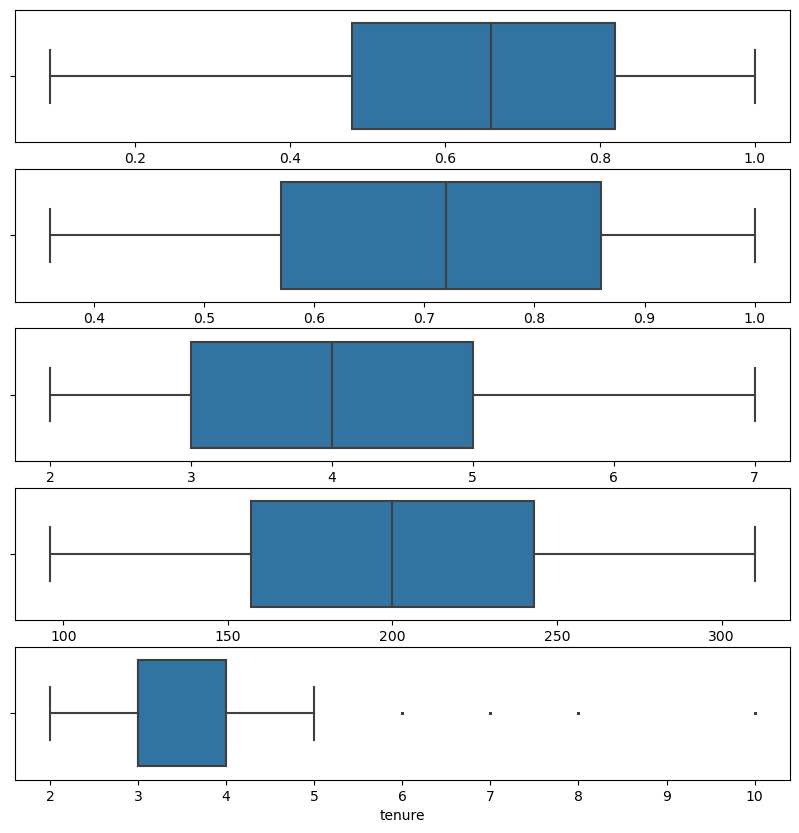

In [68]:
df_subset=df.drop(columns=['department','salary','work_accident',
                           'left','promotion_last_5years'], axis=1)
fig, axes=plt.subplots(5,1, figsize=(10,10))
for i,column in enumerate(df_subset.columns):
    sns.boxplot(data=df_subset, x=column, fliersize=True, ax=axes[i])


In [69]:
df[df['tenure']>5].count()

satisfaction_level       824
last_evaluation          824
number_project           824
avg_monthly_hrs          824
tenure                   824
work_accident            824
left                     824
promotion_last_5years    824
department               824
salary                   824
dtype: int64

In [70]:

percentile25 = df['tenure'].quantile(0.25)

percentile75 = df['tenure'].quantile(0.75)


iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [71]:
df['left'].value_counts()
df['left'].value_counts(normalize=True)*100

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [72]:
df.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [73]:
df_2=df.groupby('left')[['satisfaction_level']].agg('mean')
df_2

,satisfaction_level
left,
0,0.667365
1,0.440271


In [74]:
df_1=df.groupby('department').agg('sum')
df_1

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary
department,,,,,,,,,
IT,618.80,697.89,3706,195823,3270,139,158,2,mediummediummediummediummediummediumlowlowlowl...
RandD,435.26,494.81,2672,139696,2304,119,85,21,mediummediummediummediummediummediummediummedi...
accounting,377.53,448.30,2381,124745,2114,87,109,10,lowlowlowlowmediummediummediumlowmediummediumm...
hr,373.79,430.13,2209,119822,1957,80,113,11,lowlowlowlowmediummediummediumhighmediummedium...
management,275.55,316.67,1673,87867,1736,72,52,36,mediumlowlowlowlowlowlowmediumlowmediumlowlowl...
marketing,427.20,483.51,2504,134255,2303,108,112,27,mediumlowlowlowlowlowlowlowlowlowlowlowlowlowl...
product_mng,432.06,489.66,2603,136441,2292,109,110,0,mediummediummediummediummediumhighlowmediummed...
sales,2044.94,2300.98,12234,648584,10950,498,550,58,lowmediummediumlowlowlowlowlowlowlowlowlowlowl...
support,1156.01,1316.58,6958,365342,5996,299,312,16,lowlowlowlowlowlowlowlowlowlowlowlowlowlowlowl...


In [75]:
df_1=df.groupby('department')[['satisfaction_level']].agg('mean')
df_1

,satisfaction_level
department,
IT,0.634016
RandD,0.627176
accounting,0.607939
hr,0.621947
management,0.631995
marketing,0.634770
product_mng,0.629825
sales,0.631349
support,0.634822


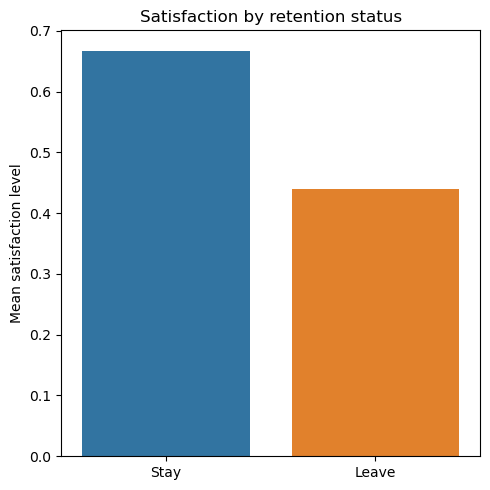

In [76]:
plt.figure(figsize=(5,5))
df_2=df.groupby('left')[['satisfaction_level']].agg('mean')
sns.barplot(data=df_2, y='satisfaction_level', x=['Stay','Leave'])
plt.ylabel('Mean satisfaction level')
plt.title('Satisfaction by retention status')
plt.tight_layout()
plt.show()

**Note:** As expected, average satisfaction level for employee who left is lower.

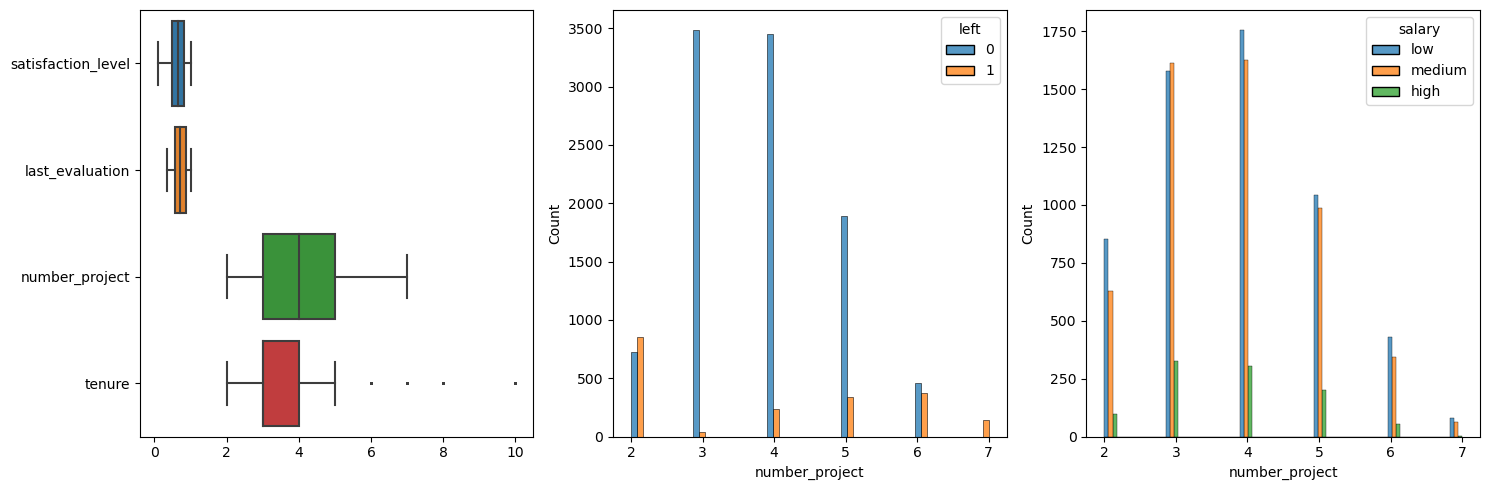

In [77]:
fig, axes=plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=df_subset.drop(columns=['avg_monthly_hrs'], axis=1), orient='h', ax=axes[0], fliersize=True)
sns.histplot(data=df_subset, x='number_project', ax=axes[1], hue=df['left'], multiple='dodge')
sns.histplot(data=df_subset, x='number_project', ax=axes[2], hue=df['salary'], multiple='dodge')
plt.tight_layout()

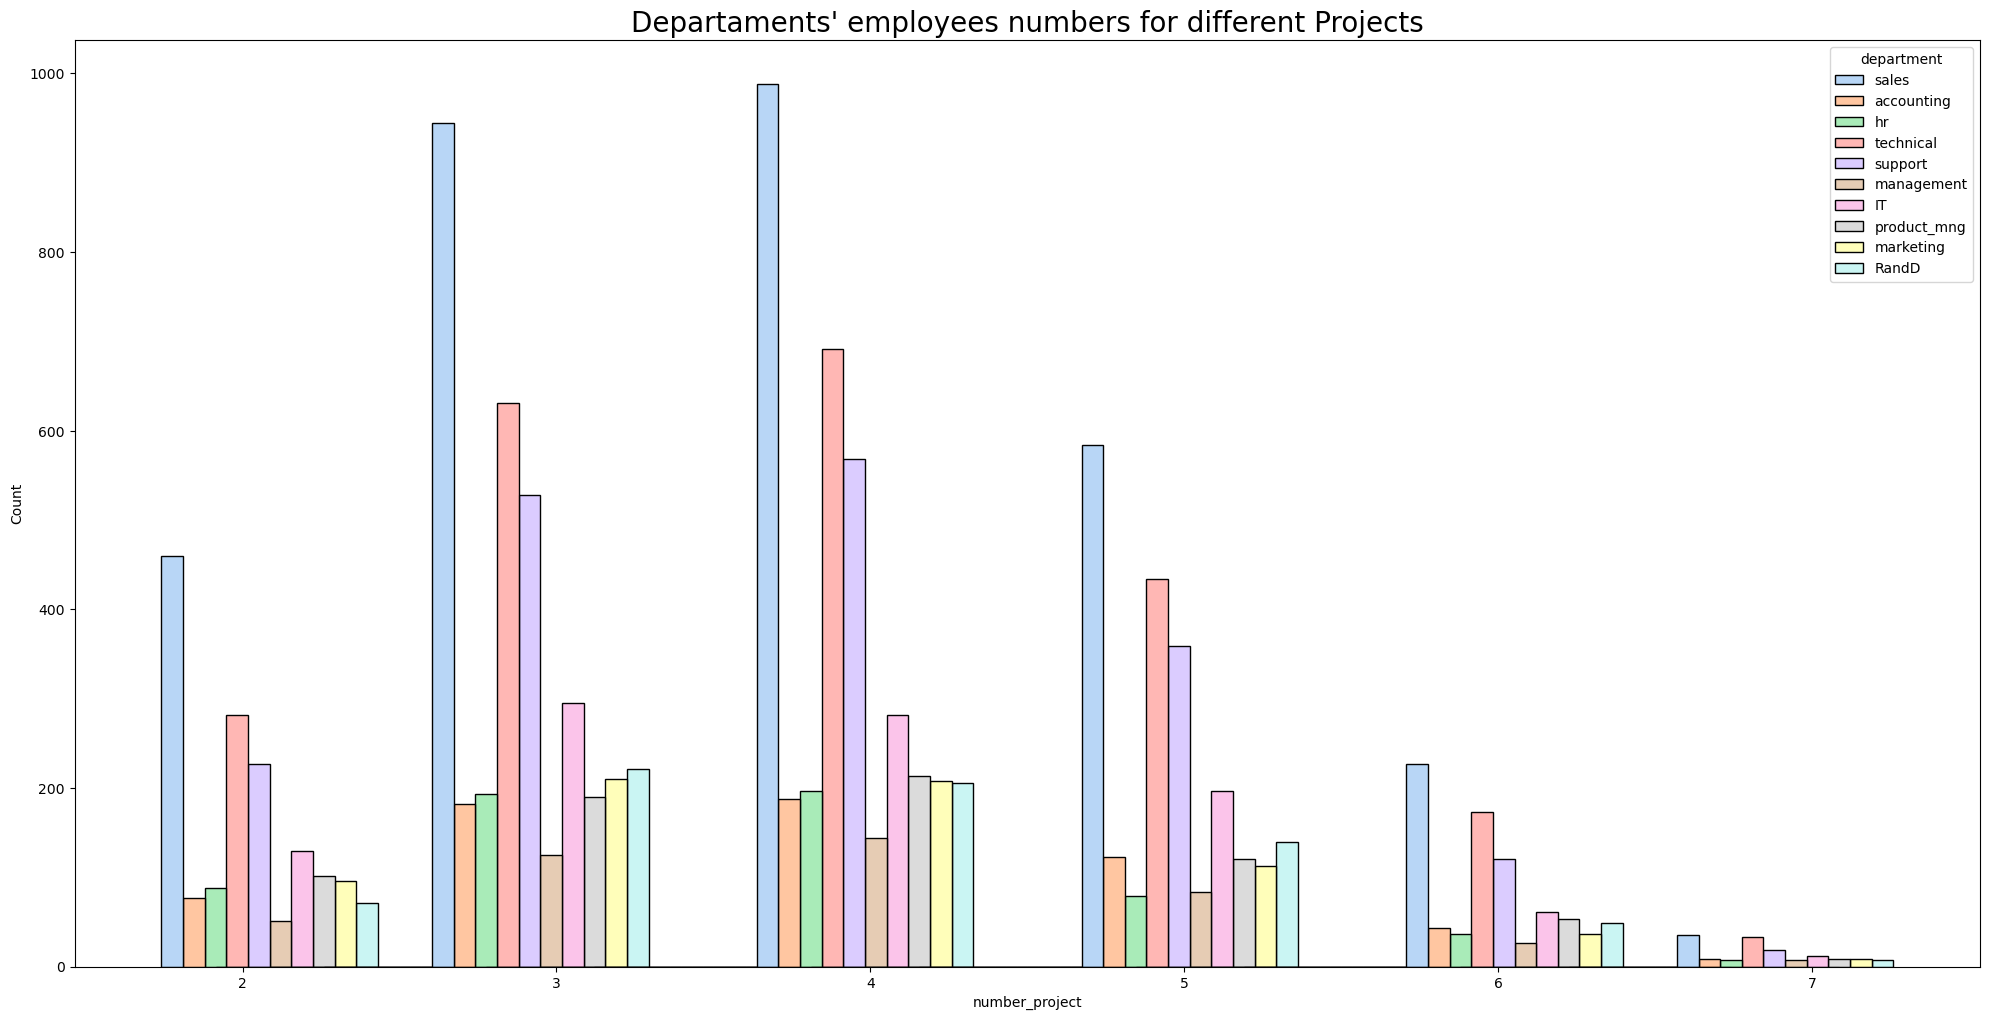

In [78]:
plt.figure(figsize=(20,10))
sns.histplot(data=df_subset, x='number_project', hue=df['department'], multiple='dodge', shrink=4, 
             palette='pastel', )
plt.tight_layout()
plt.title("Departaments' employees numbers for different Projects",fontdict={'fontsize':20})
plt.show()

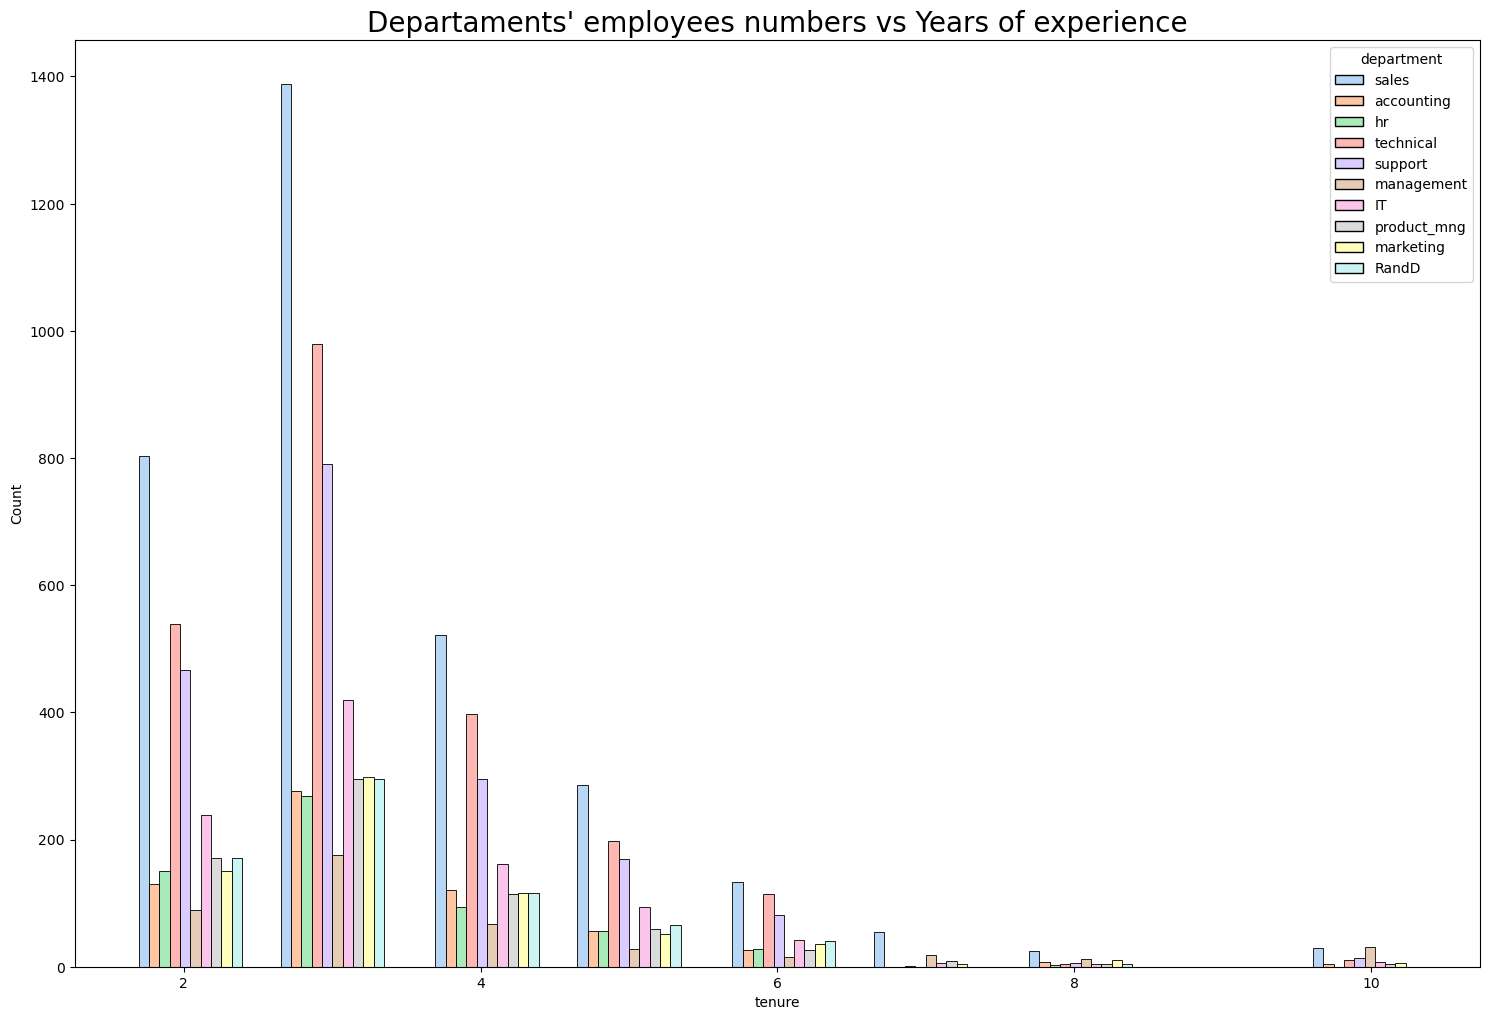

In [79]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_subset, x='tenure', hue=df['department'], multiple='dodge', shrink=8, 
             palette='pastel', )
plt.tight_layout()
plt.title("Departaments' employees numbers vs Years of experience",fontdict={'fontsize':20})
plt.show()

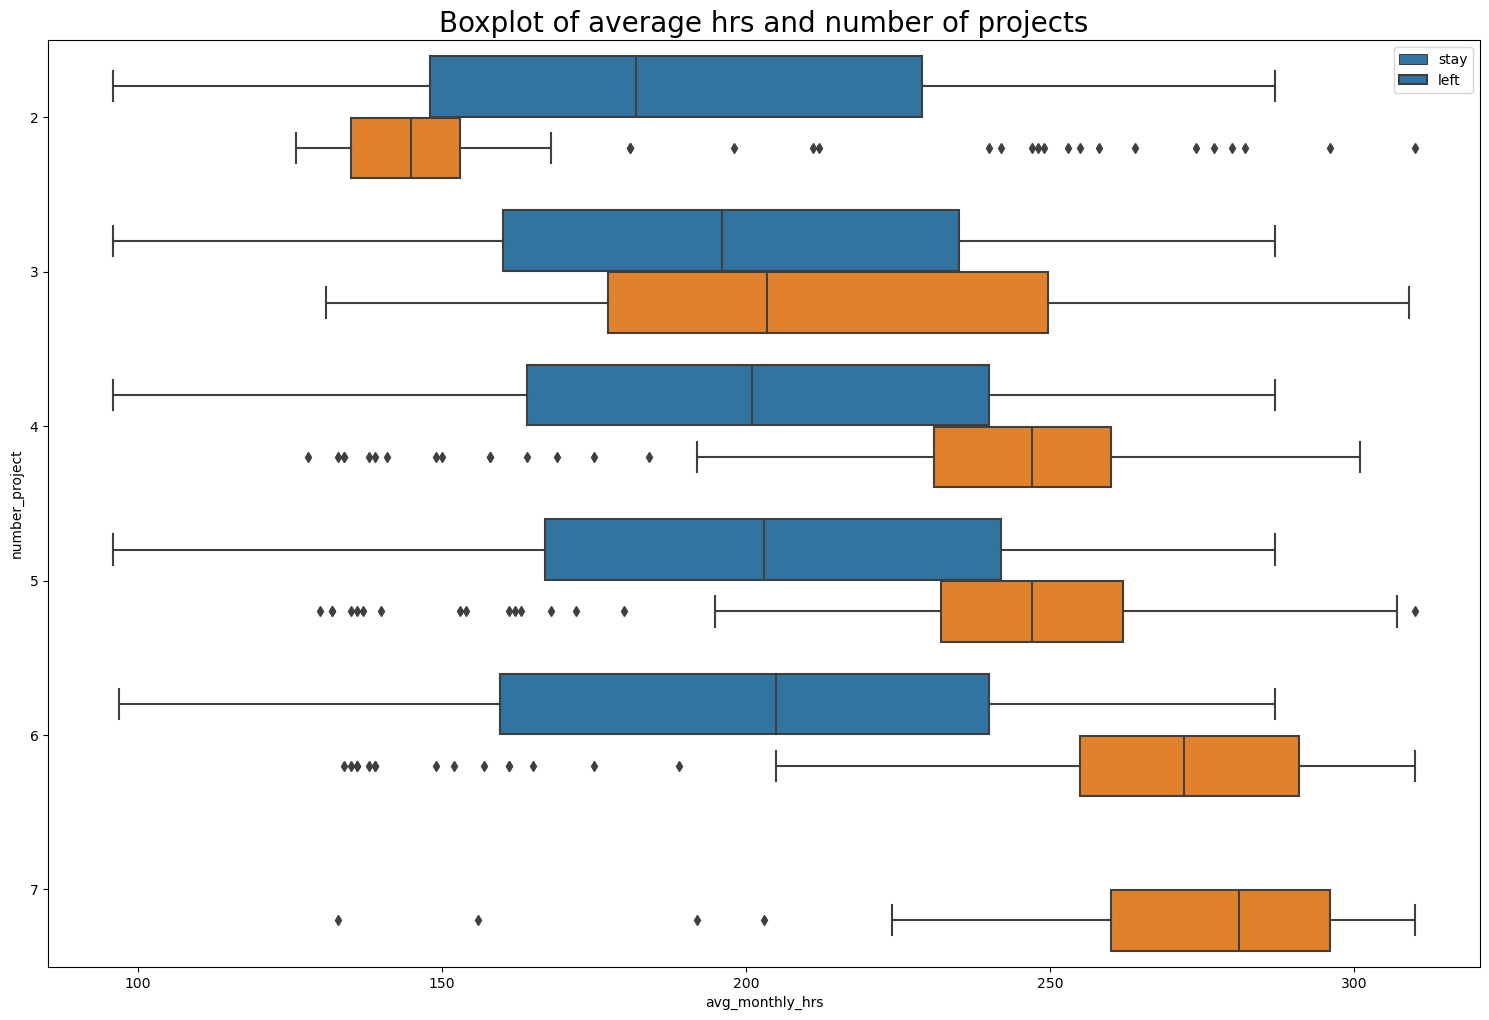

In [80]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(data=df_subset, x='avg_monthly_hrs', y='number_project', orient='h', hue=df['left'])
plt.tight_layout()
plt.title("Boxplot of average hrs and number of projects",fontdict={'fontsize':20})
plt.legend(labels=['stay', 'left'])
plt.show()

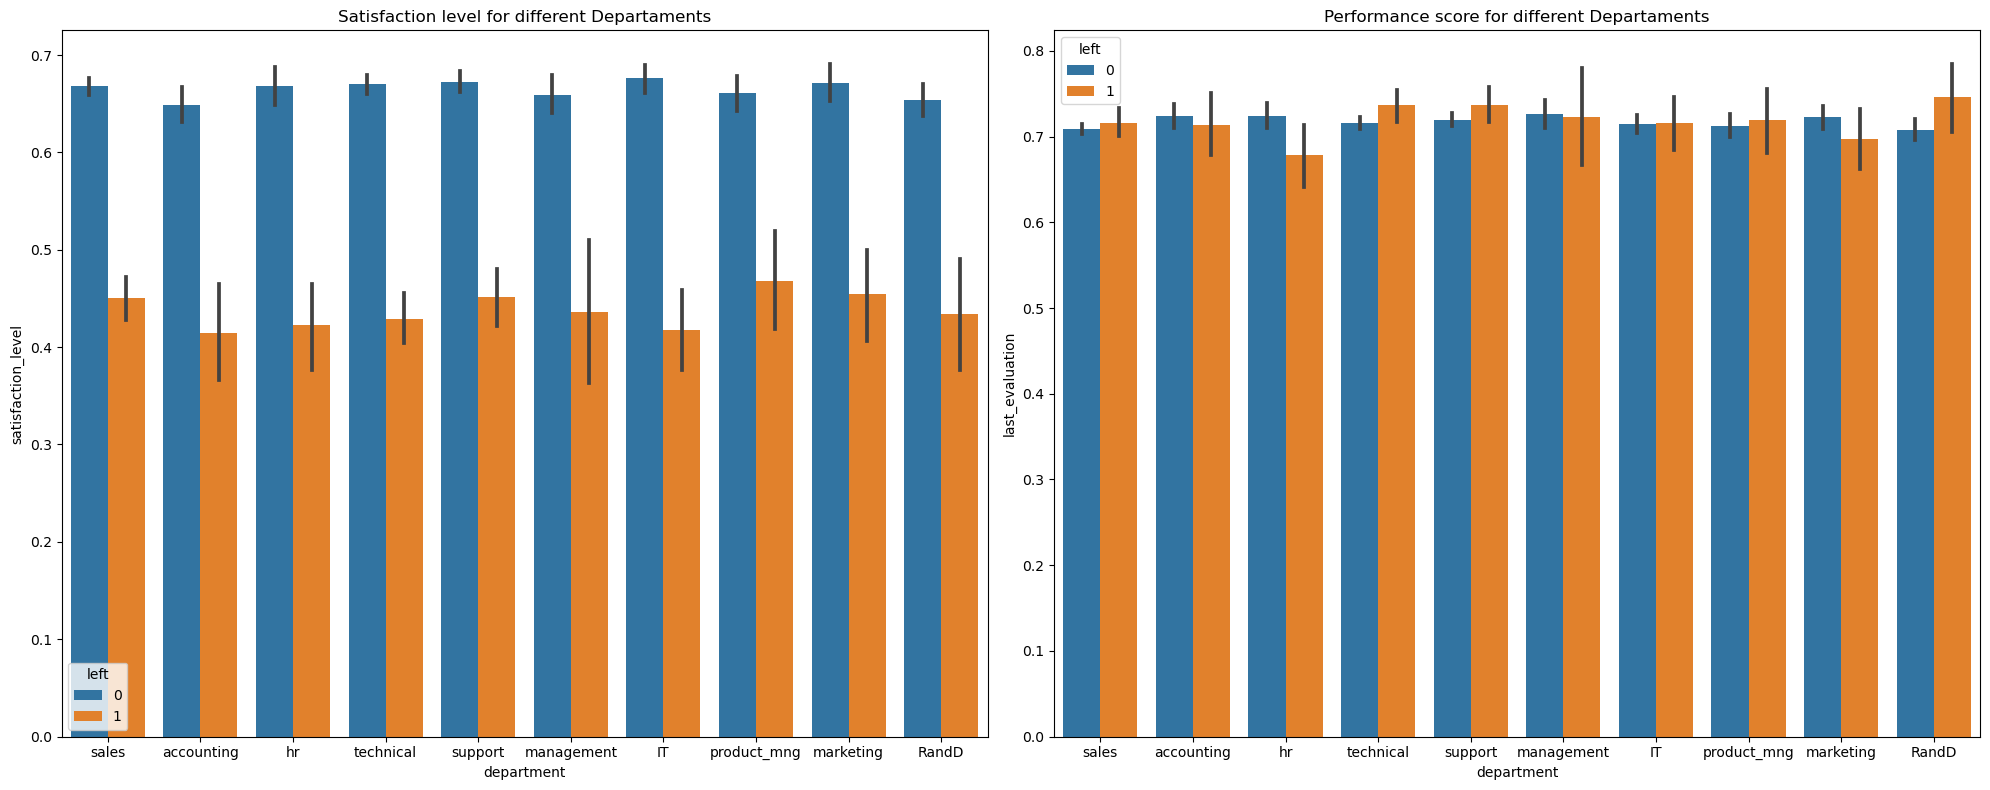

In [81]:
fig, axes=plt.subplots(1,2, figsize=(20,8))
sns.barplot(data=df, x='department', y='satisfaction_level', hue='left', ax=axes[0])
axes[0].set_title('Satisfaction level for different Departaments',)
sns.barplot(data=df, x='department', y='last_evaluation', hue='left', ax=axes[1])
axes[1].set_title('Performance score for different Departaments')
plt.tight_layout()
plt.show()

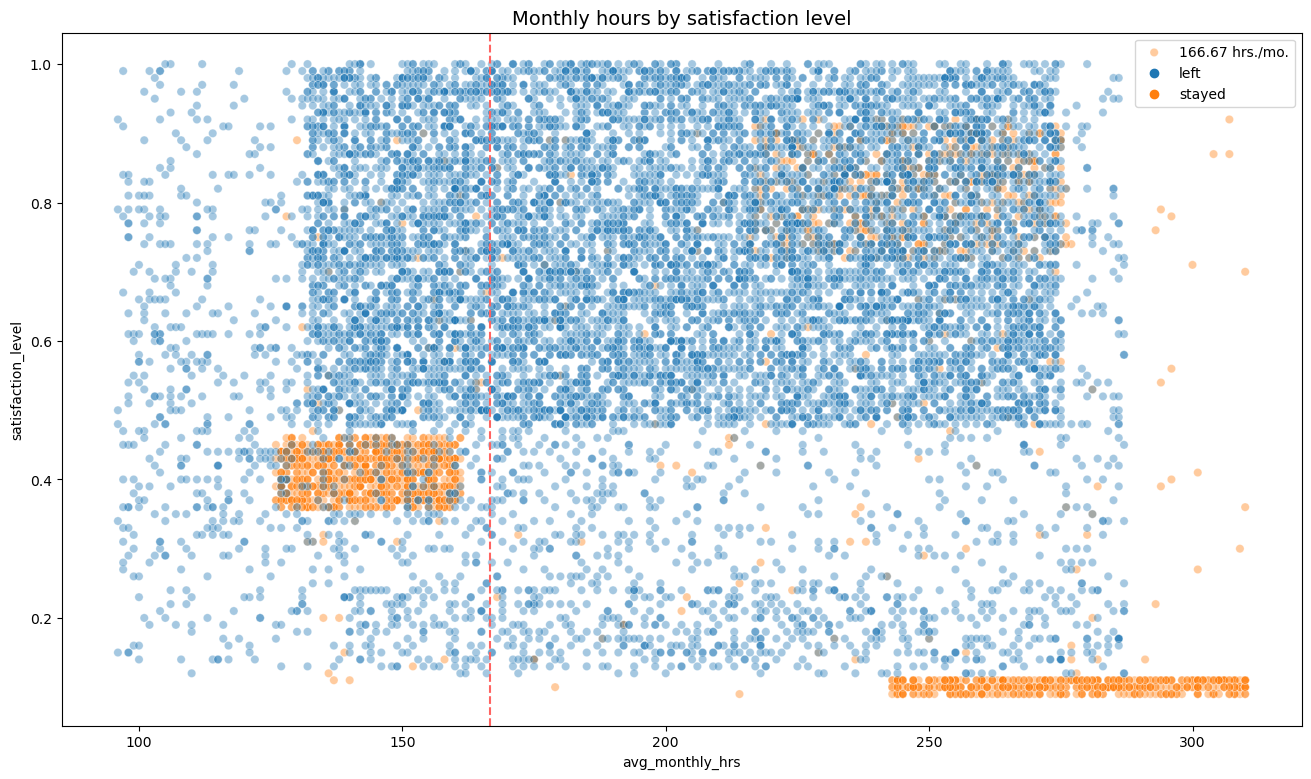

In [82]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='avg_monthly_hrs', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize='14');

<Axes: xlabel='avg_monthly_hrs', ylabel='last_evaluation'>

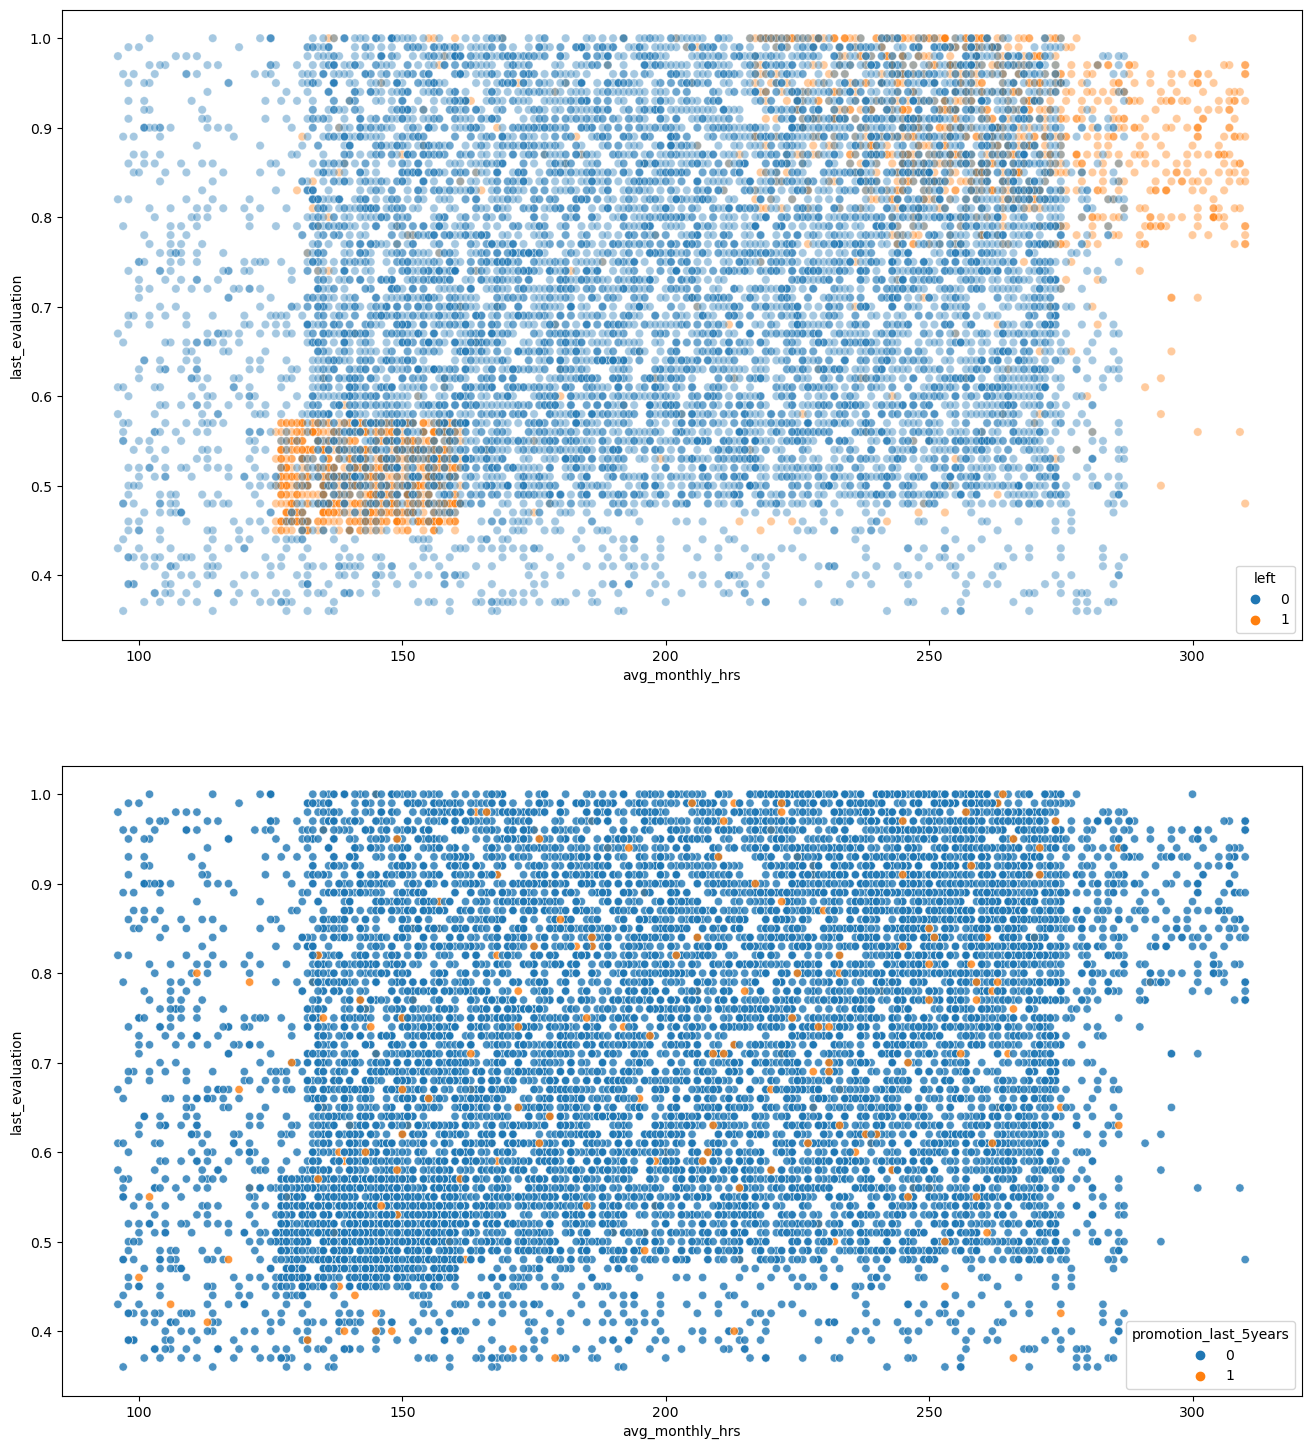

In [83]:
fig, ax=plt.subplots(2,1, figsize=(16,18))
sns.scatterplot(data=df, x='avg_monthly_hrs', y='last_evaluation', hue='left', alpha=0.4, ax=ax[0])
sns.scatterplot(data=df, x='avg_monthly_hrs', y='last_evaluation', hue='promotion_last_5years', alpha=0.8, ax=ax[1])

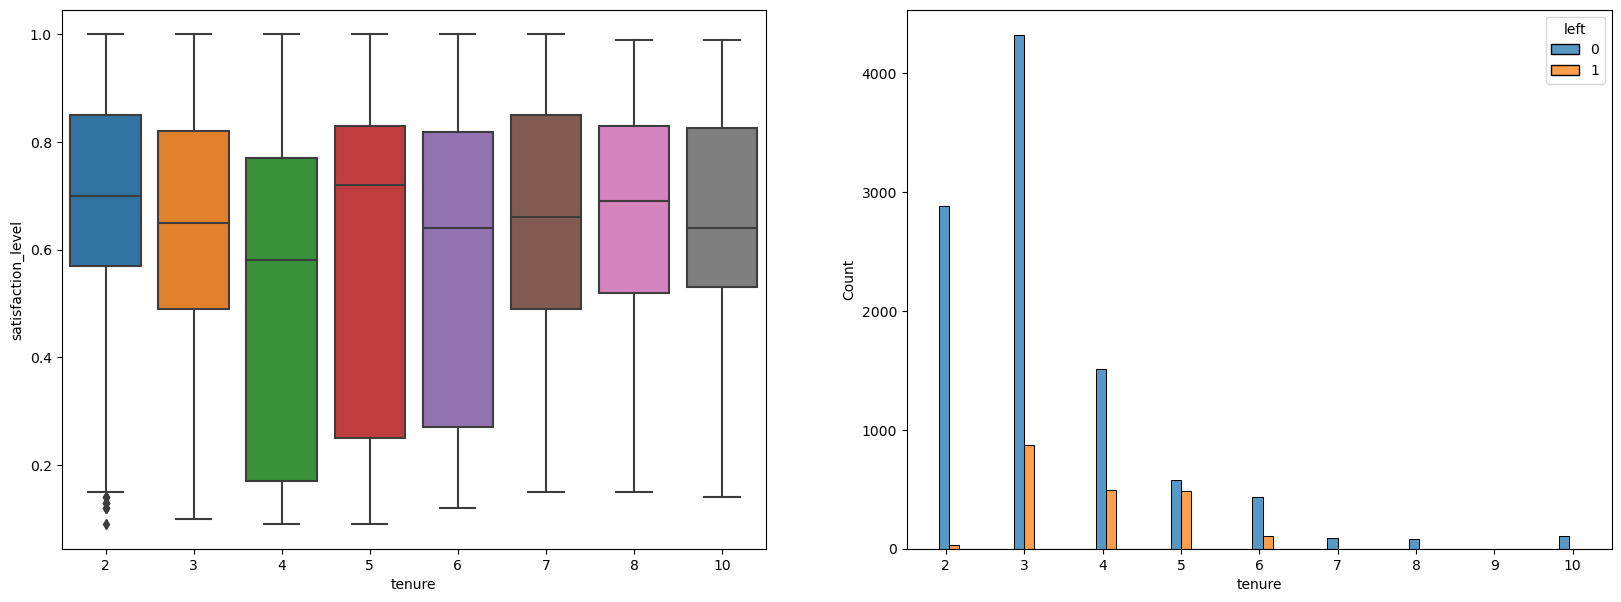

In [84]:
fig, ax=plt.subplots(1,2, figsize=(20,7))
sns.boxplot(data=df, y='satisfaction_level', x='tenure', orient='v', ax=ax[0])
sns.histplot(data=df, x='tenure', hue='left', ax=ax[1], multiple='dodge', shrink=3)
plt.show()

<Axes: xlabel='tenure', ylabel='last_evaluation'>

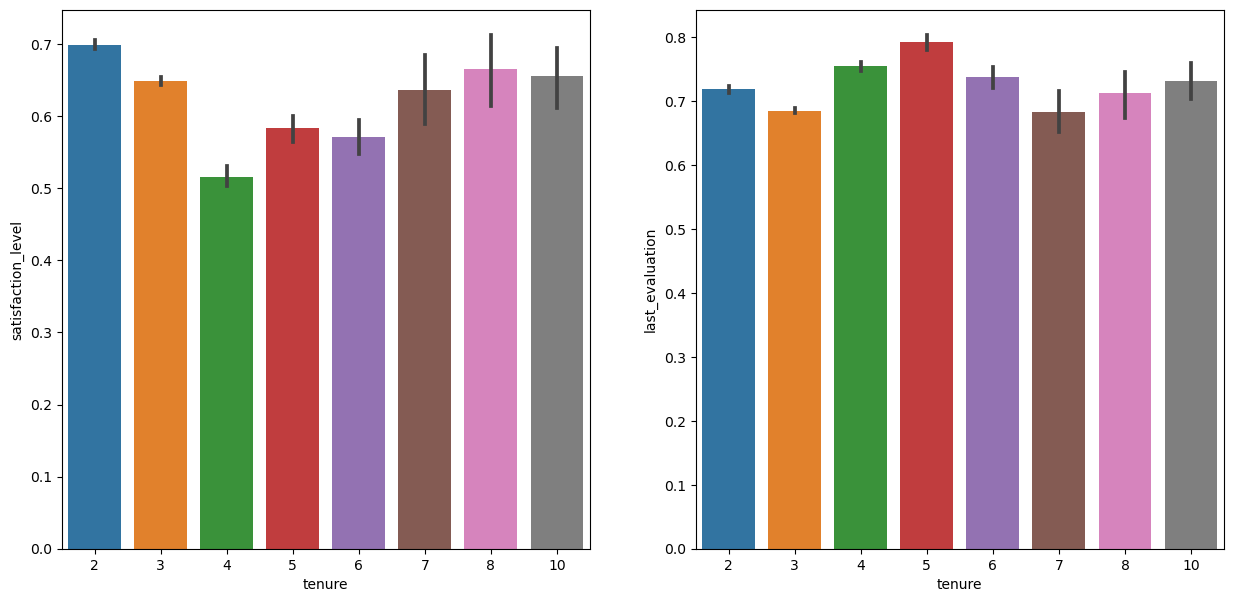

In [85]:
fig, ax=plt.subplots(1,2, figsize=(15,7))
sns.barplot(data=df, x='tenure', y='satisfaction_level', ax=ax[0])
sns.barplot(data=df, x='tenure', y='last_evaluation', ax=ax[1])

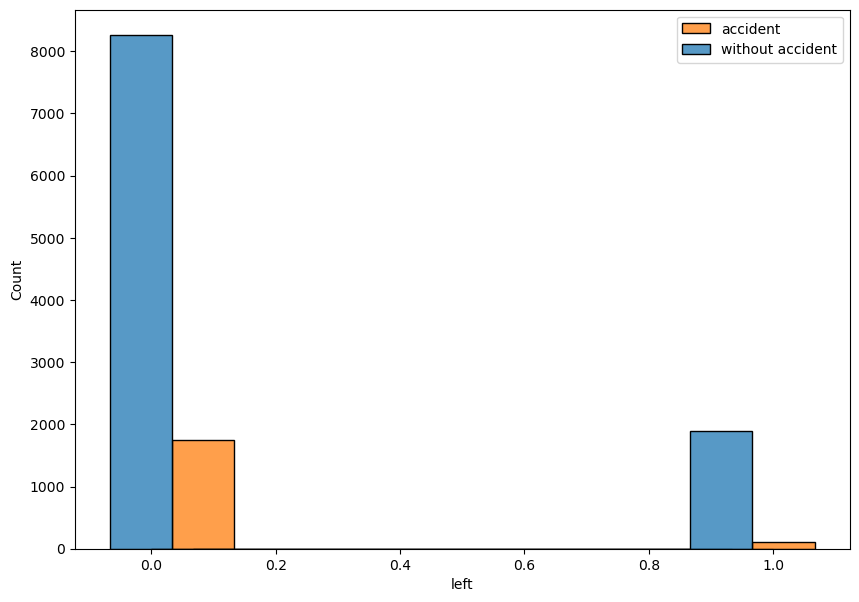

In [86]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x='left', hue='work_accident', multiple='dodge', shrink=3)
plt.legend(labels=['accident', 'without accident'])
plt.show()

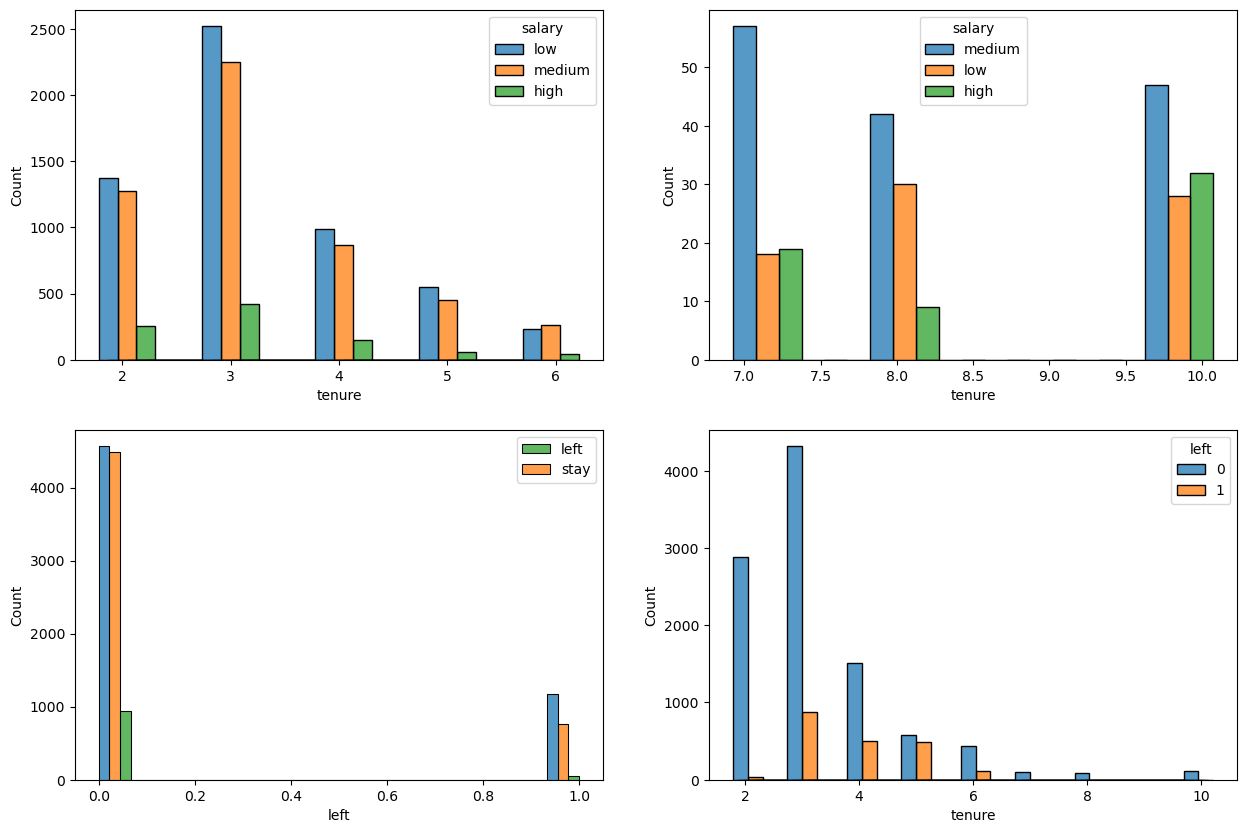

In [87]:
fig, ax=plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=df[df['tenure']<6.5], x='tenure', hue='salary', multiple='dodge', ax=ax[0][0], shrink=6)
sns.histplot(data=df[df['tenure']>6.5], x='tenure', hue='salary', multiple='dodge', ax=ax[0][1], shrink=1.5)
sns.histplot(data=df, x='left', hue='salary', multiple='dodge', ax=ax[1][0])
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', ax=ax[1][1], shrink=6)

ax=ax[1][0].legend(labels=['left','stay'])

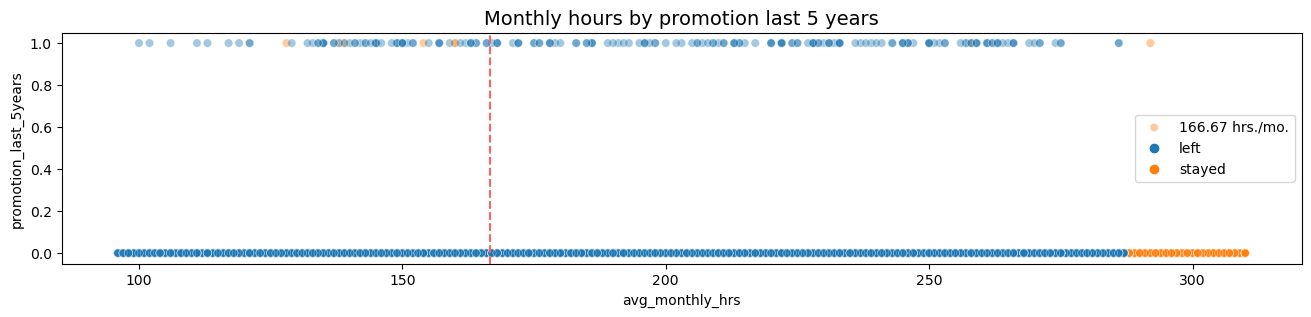

In [88]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='avg_monthly_hrs', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

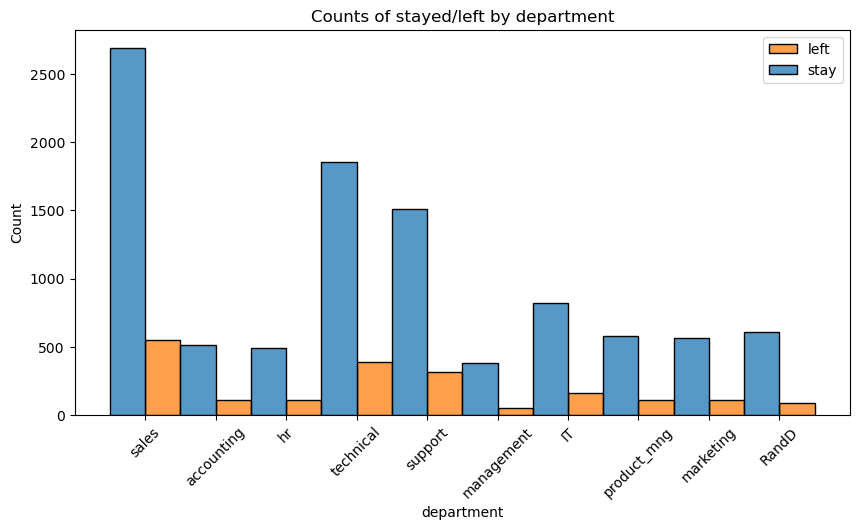

In [89]:
plt.figure(figsize=(10,5))
fig=sns.histplot(data=df, x='department', hue='left', multiple='dodge')
fig.legend(labels=['left','stay'])
fig.set_title('Counts of stayed/left by department')
plt.xticks(rotation=45)


In [91]:
df.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


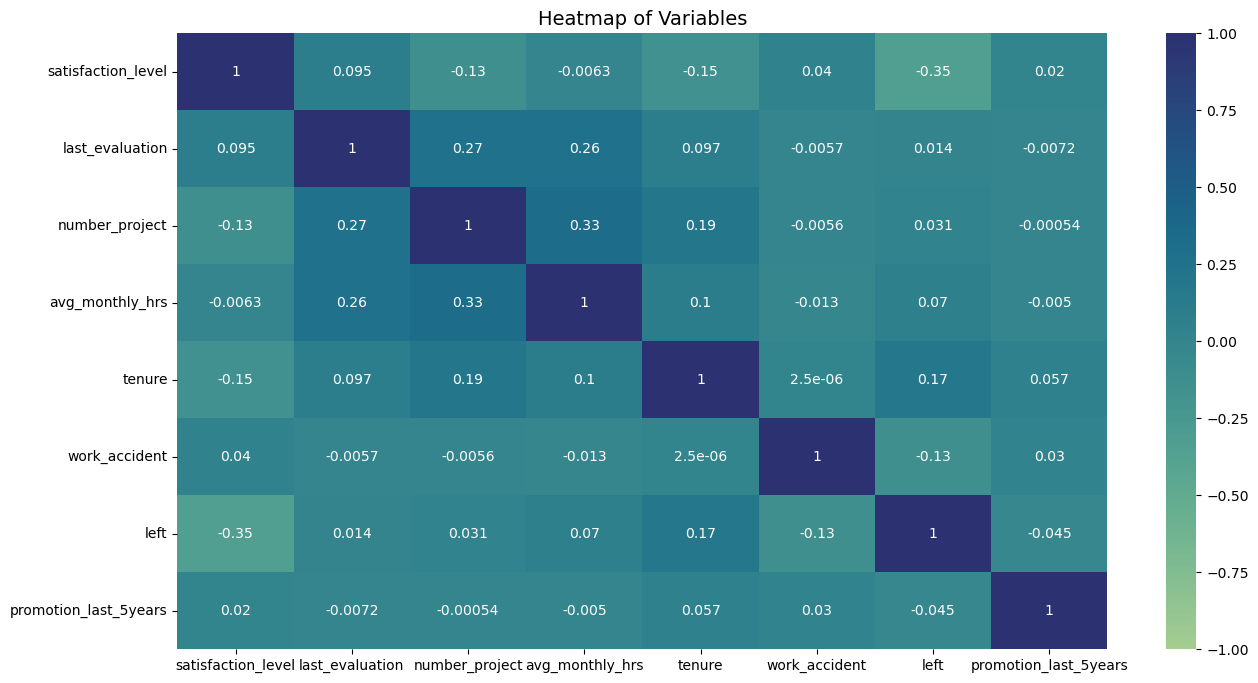

In [92]:
plt.figure(figsize=(15,8))
hm=sns.heatmap(data=df.drop(columns=['department','salary']).corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='crest')
hm.set_title('Heatmap of Variables', fontdict={'fontsize':14})
plt.show()

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### Modeling

Add as many cells as you need to conduct the modeling process.

In [33]:
df_enc=df.copy()
df_enc['salary']=df_enc['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes
df_enc=pd.get_dummies(data=df_enc, drop_first=True)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


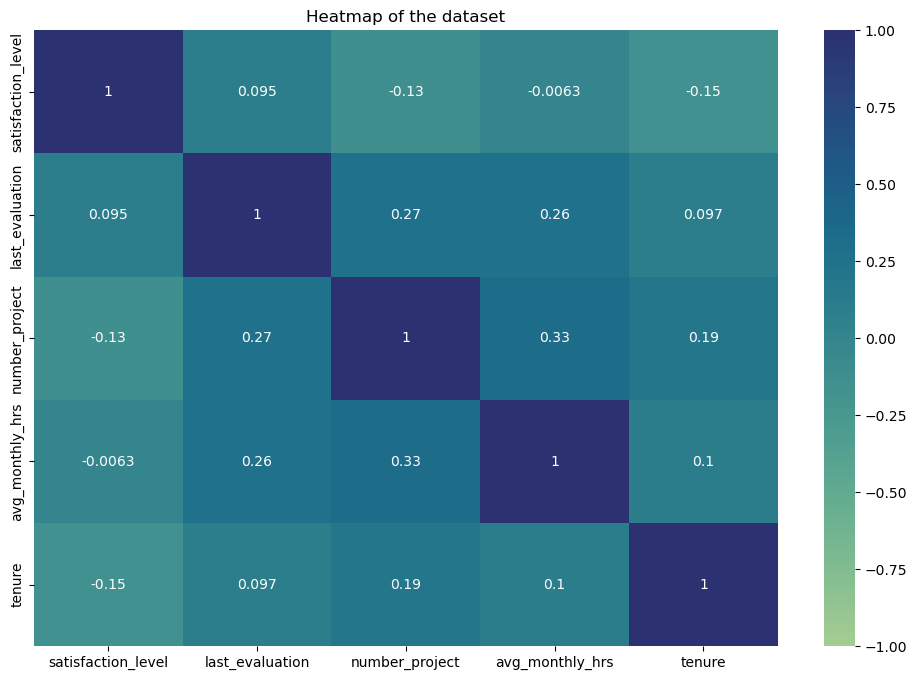

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_enc[['satisfaction_level','last_evaluation','number_project','avg_monthly_hrs','tenure']].
            corr(),annot=True, vmin=-1, vmax=1, cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()

In [35]:
df_logreg=df_enc[((df_enc['tenure']>=lower_limit) & (df_enc['tenure']<=upper_limit))]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [36]:
y=df_logreg['left']
X=df_logreg.drop(columns='left', axis=1)

In [37]:
y.value_counts()

left
0    9285
1    1882
Name: count, dtype: int64

In [38]:
X_tr, X_test, y_tr, y_test=train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [39]:
%%time
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_tr, y_tr)

CPU times: user 1.9 s, sys: 45 ms, total: 1.95 s
Wall time: 273 ms


In [40]:
y_pred=log_clf.predict(X_test)

<Figure size 800x800 with 0 Axes>

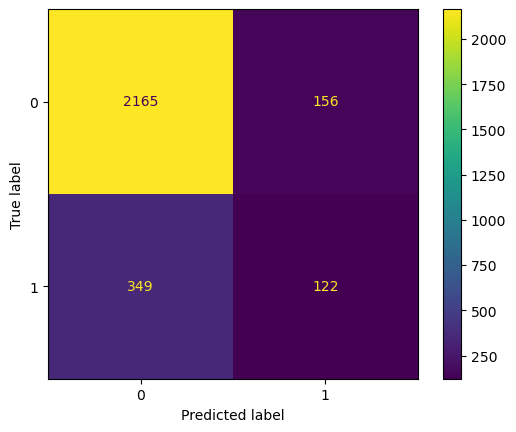

In [41]:
ax=plt.figure(figsize=(8,8))
log_cm=confusion_matrix(y_test,y_pred, labels=log_clf.classes_)
Disp=ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
Disp.plot(values_format='')

In [42]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [43]:
y=df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [44]:
X=df_enc.drop(columns='left', axis=1)

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [46]:
tree=DecisionTreeClassifier(random_state=0)
tree_params={
    'max_depth':[4,6,8, None],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[2,5,1]
}

scoring1=['accuracy','precision','recall','f1', 'roc_auc']
tree_cv=GridSearchCV(estimator=tree, param_grid=tree_params, scoring=scoring1, cv=4, refit='roc_auc')

In [47]:
%%time
tree_cv.fit(X_train, y_train)

CPU times: user 3.06 s, sys: 7.67 ms, total: 3.07 s
Wall time: 3.09 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [100]:
path = r'/Users/vagifaliyev/Desktop/Vaqo DSA/Coursera/Advanced Data Analytics/Course 7/Module 1/Lab/Pickles/'

def write_pickle(path, model_object, save_name:str):
    with open(path+save_name+'.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
def read_pickle(path, saved_model_name:str):
    with open(path+saved_model_name+'.pickle', 'rb') as to_read:
        model=pickle.load(to_read)
        return model

write_pickle(path, tree_cv, 'tuned_decision_tree')

In [48]:
print(tree_cv.best_estimator_)
print('\n')
print(tree_cv.best_params_)
print('\n')
print(tree_cv.best_score_)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6,
                       random_state=0)


{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}


0.9757623078283226


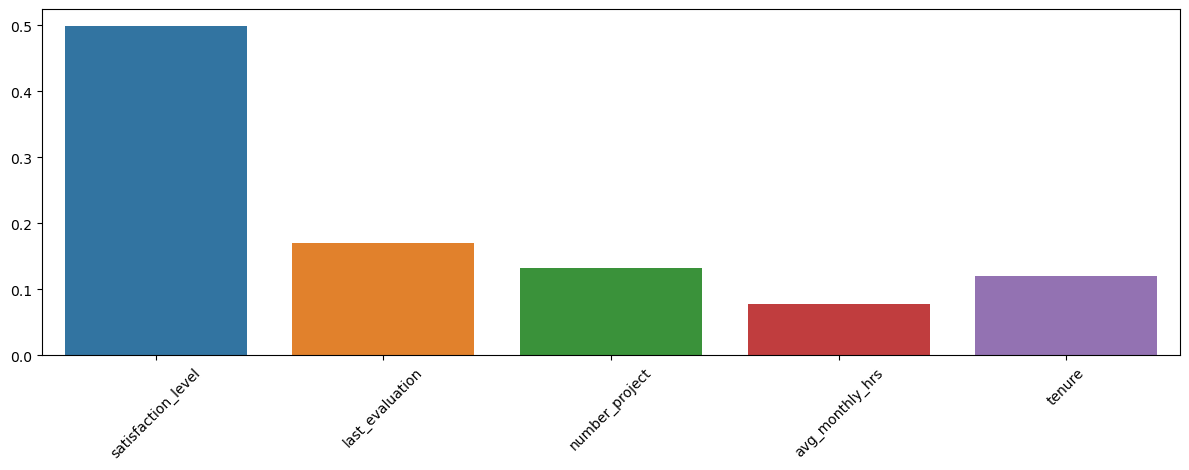

In [49]:
plt.figure(figsize=(12,4))
importance=tree_cv.best_estimator_.feature_importances_
sns.barplot(y=importance[0:5], x=X.columns[0:5])
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [50]:
def make_cv_table(model_name: str, model, metric:str):
    table_1=pd.DataFrame(model.cv_results_)
    params={
        'accuracy':'mean_test_accuracy',
        'precision':'mean_test_precision',
        'recall':'mean_test_recall',
        'f1':'mean_test_f1',
        'roc_auc':'mean_test_roc_auc'
    }

    best_results=table_1.iloc[table_1[params[metric]].idxmax(),:]
    
    ac_score=best_results.mean_test_accuracy
    pr_score=best_results.mean_test_precision
    rc_score=best_results.mean_test_recall
    f1_score=best_results.mean_test_f1
    roc_score=best_results.mean_test_roc_auc
    table_2=pd.DataFrame({'Model Name':[model_name],
                         'Accuracy':[ac_score],
                         'Precision':[pr_score],
                         'Recall':[rc_score],
                         'F1':[f1_score],
                         'ROC_AUC':[roc_score]})
    return table_2

In [51]:
DT_table=make_cv_table('Tuned Decision Tree', tree_cv,'recall')
DT_table

,Model Name,Accuracy,Precision,Recall,F1,ROC_AUC
0,Tuned Decision Tree,0.982542,0.971788,0.921639,0.946022,0.964794
